In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "Ahmad_Mayorga-Llano_Khalid.csv"
snacks_data = pd.read_csv(file)

In [3]:
snacks_data.rename(columns={"fruits-vegetables-nuts-estimate-from-ingredients_100g": "fruit_vege_nut_100g"}, inplace=True)

In [4]:
snacks_data.sample(5)

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g,fruit_vege_nut_100g,url,image_url
238,2006050107278,isaura,Chocolat dessert Lait,Chocolate products,24.0,e,2306.0,51.0,20.0,0.23,7.0,3.5,0.000000,http://world-fr.openfoodfacts.org/produit/2006...,https://images.openfoodfacts.org/images/produc...
122,8003130142260,San Carlo,1936 Antica Ricetta,Appetizers,6.0,c,1998.0,0.6,2.1,1.10,7.0,5.5,0.000000,http://world-fr.openfoodfacts.org/produit/8003...,https://images.openfoodfacts.org/images/produc...
231,3083681008647,Bonduelle,Coleslaw à la moutarde à l'ancienne,One-dish meals,-3.0,a,518.0,5.5,0.8,0.60,1.0,2.5,80.751149,http://world-fr.openfoodfacts.org/produit/3083...,https://images.openfoodfacts.org/images/produc...
165,4751036540355,the beginnings,flap jack chocolate bar,Biscuits and cakes,16.0,d,2014.0,22.0,22.0,0.40,7.0,7.0,0.000000,http://world-fr.openfoodfacts.org/produit/4751...,https://images.openfoodfacts.org/images/produc...
142,3258561011097,Belle France,Croustillants Goût bacon,Appetizers,11.0,d,2038.0,2.6,1.9,1.60,6.4,3.0,0.000000,http://world-fr.openfoodfacts.org/produit/3258...,https://images.openfoodfacts.org/images/produc...


In [5]:
energy_points = {
    (-99999, 335): 0,
    (335, 670): 1,
    (670, 1005): 2,
    (1005, 1340): 3,
    (1340, 1675): 4,
    (1675, 2010): 5,
    (2010, 2345): 6,
    (2345, 2680): 7,
    (2680, 3015): 8,
    (3015, 3350): 9,
    (3350, 99999): 10,
}

sugar_points = {
    (-99999, 4.5): 0,
    (4.5, 9): 1,    
    (9, 13.5): 2,    
    (13.5, 18): 3,    
    (18, 22.5): 4,    
    (22.5, 27): 5,    
    (27, 31): 6,    
    (31, 36): 7,    
    (36, 40): 8,    
    (40, 45): 9,    
    (45, 99999): 10,  
}

fat_points = {
    (-99999, 1): 0,
    (1, 2): 1,    
    (2, 3): 2,    
    (3, 4): 3,    
    (4, 5): 4,    
    (5, 6): 5,    
    (6, 7): 6,    
    (7, 8): 7,    
    (8, 9): 8,    
    (9, 10): 9,    
    (10, 99999): 10,  
}

salt_points = {
    (-99999, 0.225): 0,
    (0.225, 0.450): 1,    
    (0.450, 0.675): 2,    
    (0.675, 0.900): 3,    
    (0.900, 1.125): 4,    
    (1.125, 1.350): 5,    
    (1.350, 1.575): 6,    
    (1.575, 1.800): 7,    
    (1.800, 2.025): 8,    
    (2.025, 2.250): 9,    
    (2.250, 99999): 10,  
}

protein_points = {
    (-99999, 1.6): 0,
    (1.6, 3.2): 1,    
    (3.2, 4.8): 2,    
    (4.8, 5.8): 3,    
    (5.8, 7.0): 4,    
    (7.0, 99999): 5,
}

fiber_points = {
    (-99999, 0.9): 0,
    (0.9, 1.9): 1,    
    (1.9, 2.8): 2,    
    (2.8, 3.7): 3,    
    (3.7, 4.7): 4,      
    (4.7, 99999): 5,  
}

fruit_vege_nut_points = {
    (-99999, 10): 0,
    (10, 20): 1,    
    (20, 30): 2,    
    (30, 40): 3,  
    (40, 55): 4,   
    (55, 70): 8,
    (70, 99999): 12,
}

# fit_nutri_grading = {
#     (-29.5, -16.1): "a",
#     (-16.1, -2.7): "b",    
#     (-2.7, 10.7): "c",    
#     (10.7, 24.1): "d",    
#     (24.1, 37.51): "e", 
# }

fit_nutri_grading = {
    (-100, -10): "a",
    (-10, -3): "b",    
    (-3, 4): "c",    
    (4, 11): "d",    
    (11, 100): "e", 
}

In [6]:
def assign_score(value, score_ranges):
    for (lower, upper), score in score_ranges.items():
        if lower <= value < upper:
            return score
    return 0 

In [7]:
# snacks_data = snacks.copy()

In [8]:
snacks_data.head(3)

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,proteins_100g,fiber_100g,fruit_vege_nut_100g,url,image_url
0,7501030459620,Bimbo,Multigrano arandanos y sabor fresa,Biscuits and cakes,11.0,d,1940.0,29.4,4.41,0.411,5.88,5.88,15.0,http://world-fr.openfoodfacts.org/produit/7501...,https://images.openfoodfacts.org/images/produc...
1,3222476920348,Casino,Les gourmandises chocolat noir et fruits - Fra...,Sweets,21.0,e,1958.0,60.0,13.00,0.020,3.30,4.60,23.0,http://world-fr.openfoodfacts.org/produit/3222...,https://images.openfoodfacts.org/images/produc...
2,4316268596466,"Clarkys, Netto MD",Tortilla Chips - Salted,One-dish meals,1.0,b,1979.0,0.8,2.00,0.900,6.60,4.00,0.0,http://world-fr.openfoodfacts.org/produit/4316...,https://images.openfoodfacts.org/images/produc...


In [9]:
snacks_data["energy_score"] = snacks_data["energy-kj_100g"].apply(
    lambda x: assign_score(x, energy_points)
)
snacks_data["sugar_score"] = snacks_data["sugars_100g"].apply(
    lambda x: assign_score(x, sugar_points)
)
snacks_data["fat_score"] = snacks_data["saturated-fat_100g"].apply(
    lambda x: assign_score(x, fat_points)
)
snacks_data["salt_score"] = snacks_data["salt_100g"].apply(
    lambda x: assign_score(x, salt_points)
)
snacks_data["protein_score"] = snacks_data["proteins_100g"].apply(
    lambda x: assign_score(x, protein_points)
)
snacks_data["fibre_score"] = snacks_data["fiber_100g"].apply(
    lambda x: assign_score(x, fiber_points)
)
snacks_data["fruit_vege_nut_score"] = snacks_data["fruit_vege_nut_100g"].apply(
    lambda x: assign_score(x, fruit_vege_nut_points)
)


In [10]:
# snacks_data = snacks_data[['code', 'brands', 'product_name', 'pnns_groups_2', 'nutriscore_score',
#        'nutriscore_grade', 'energy_score', 'sugar_score', 'fat_score', 'salt_score',
#        'protein_score', 'fibre_score', 'fruit_vege_nut_score']]

# snacks_data.drop(columns= ["url", "image_url"], inplace = True)

In [11]:
snacks_data

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,...,fruit_vege_nut_100g,url,image_url,energy_score,sugar_score,fat_score,salt_score,protein_score,fibre_score,fruit_vege_nut_score
0,7501030459620,Bimbo,Multigrano arandanos y sabor fresa,Biscuits and cakes,11.0,d,1940.0,29.4,4.41,0.411,...,15.000000,http://world-fr.openfoodfacts.org/produit/7501...,https://images.openfoodfacts.org/images/produc...,5,6,4,1,4,5,1
1,3222476920348,Casino,Les gourmandises chocolat noir et fruits - Fra...,Sweets,21.0,e,1958.0,60.0,13.00,0.020,...,23.000000,http://world-fr.openfoodfacts.org/produit/3222...,https://images.openfoodfacts.org/images/produc...,5,10,10,0,2,4,2
2,4316268596466,"Clarkys, Netto MD",Tortilla Chips - Salted,One-dish meals,1.0,b,1979.0,0.8,2.00,0.900,...,0.000000,http://world-fr.openfoodfacts.org/produit/4316...,https://images.openfoodfacts.org/images/produc...,5,0,2,4,4,4,0
3,5941768000183,Sweet & Safe,Stevia chocolate,Chocolate products,14.0,d,1741.1,14.4,20.20,0.300,...,0.000000,http://world-fr.openfoodfacts.org/produit/5941...,https://images.openfoodfacts.org/images/produc...,5,3,10,1,5,5,0
4,8005190401455,Maina,Il Pandoro,Pastries,19.0,e,1695.0,18.0,12.00,0.650,...,0.000000,http://world-fr.openfoodfacts.org/produit/8005...,https://images.openfoodfacts.org/images/produc...,5,4,10,2,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3245391055216,Grand Jury,Génoises Orange,Biscuits and cakes,17.0,d,1610.0,52.0,6.00,0.150,...,11.000000,http://world-fr.openfoodfacts.org/produit/3245...,https://images.openfoodfacts.org/images/produc...,4,10,6,0,1,2,1
306,7622300692506,"Milka,Kraft Foods",Chocolat au lait du Pays Alpin,Chocolate products,25.0,e,2210.0,59.0,18.00,0.000,...,0.390625,http://world-fr.openfoodfacts.org/produit/7622...,https://images.openfoodfacts.org/images/produc...,6,10,10,0,4,1,0
307,4000358009119,Leupoldt,Soßenkuchen,Biscuits and cakes,3.0,c,1507.0,29.0,0.20,0.050,...,0.000000,http://world-fr.openfoodfacts.org/produit/4000...,https://images.openfoodfacts.org/images/produc...,4,6,0,0,5,3,0
308,3410280020495,Top budget,Soufflé à la cacahuète,Appetizers,19.0,e,2039.0,1.8,7.40,1.430,...,19.000000,http://world-fr.openfoodfacts.org/produit/3410...,https://images.openfoodfacts.org/images/produc...,6,0,7,6,5,0,1


In [12]:
snacks_data["fit_nutri_score"] = ((1.75 * (snacks_data["sugar_score"])) \
                            + (1.75 * (snacks_data["fat_score"])) \
                            + (1.5 * (snacks_data["salt_score"]))) \
                            - ((0.45 * (snacks_data["energy_score"])) \
                            + (2.00 * (snacks_data["protein_score"])) \
                            + (1.50 * (snacks_data["fibre_score"])) \
                            + (1.50 * (snacks_data["fruit_vege_nut_score"])))

In [13]:
snacks_data

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,...,url,image_url,energy_score,sugar_score,fat_score,salt_score,protein_score,fibre_score,fruit_vege_nut_score,fit_nutri_score
0,7501030459620,Bimbo,Multigrano arandanos y sabor fresa,Biscuits and cakes,11.0,d,1940.0,29.4,4.41,0.411,...,http://world-fr.openfoodfacts.org/produit/7501...,https://images.openfoodfacts.org/images/produc...,5,6,4,1,4,5,1,-0.25
1,3222476920348,Casino,Les gourmandises chocolat noir et fruits - Fra...,Sweets,21.0,e,1958.0,60.0,13.00,0.020,...,http://world-fr.openfoodfacts.org/produit/3222...,https://images.openfoodfacts.org/images/produc...,5,10,10,0,2,4,2,19.75
2,4316268596466,"Clarkys, Netto MD",Tortilla Chips - Salted,One-dish meals,1.0,b,1979.0,0.8,2.00,0.900,...,http://world-fr.openfoodfacts.org/produit/4316...,https://images.openfoodfacts.org/images/produc...,5,0,2,4,4,4,0,-6.75
3,5941768000183,Sweet & Safe,Stevia chocolate,Chocolate products,14.0,d,1741.1,14.4,20.20,0.300,...,http://world-fr.openfoodfacts.org/produit/5941...,https://images.openfoodfacts.org/images/produc...,5,3,10,1,5,5,0,4.50
4,8005190401455,Maina,Il Pandoro,Pastries,19.0,e,1695.0,18.0,12.00,0.650,...,http://world-fr.openfoodfacts.org/produit/8005...,https://images.openfoodfacts.org/images/produc...,5,4,10,2,5,1,0,13.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3245391055216,Grand Jury,Génoises Orange,Biscuits and cakes,17.0,d,1610.0,52.0,6.00,0.150,...,http://world-fr.openfoodfacts.org/produit/3245...,https://images.openfoodfacts.org/images/produc...,4,10,6,0,1,2,1,19.70
306,7622300692506,"Milka,Kraft Foods",Chocolat au lait du Pays Alpin,Chocolate products,25.0,e,2210.0,59.0,18.00,0.000,...,http://world-fr.openfoodfacts.org/produit/7622...,https://images.openfoodfacts.org/images/produc...,6,10,10,0,4,1,0,22.80
307,4000358009119,Leupoldt,Soßenkuchen,Biscuits and cakes,3.0,c,1507.0,29.0,0.20,0.050,...,http://world-fr.openfoodfacts.org/produit/4000...,https://images.openfoodfacts.org/images/produc...,4,6,0,0,5,3,0,-5.80
308,3410280020495,Top budget,Soufflé à la cacahuète,Appetizers,19.0,e,2039.0,1.8,7.40,1.430,...,http://world-fr.openfoodfacts.org/produit/3410...,https://images.openfoodfacts.org/images/produc...,6,0,7,6,5,0,1,7.05


In [14]:
snacks_data["fit_nutri_grade"] = snacks_data["fit_nutri_score"].apply(
    lambda x: assign_score(x, fit_nutri_grading)
)

In [15]:
snacks_data.sample(10)

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,...,image_url,energy_score,sugar_score,fat_score,salt_score,protein_score,fibre_score,fruit_vege_nut_score,fit_nutri_score,fit_nutri_grade
30,4058400023088,Biscuiterie Charlotte,Marmor Butter Sterne,Biscuits and cakes,22.0,e,1939.0,28.5,15.0,0.85,...,https://images.openfoodfacts.org/images/produc...,5,6,10,3,4,2,0,19.25,e
145,4260249144408,"Erdbär, Erdbär, Freche Freunde, Erdbär","Fruchtriegel Birne, pflaume & brombeere",Biscuits and cakes,1.0,b,1539.0,26.0,1.1,0.04,...,https://images.openfoodfacts.org/images/produc...,4,5,1,0,4,5,0,-6.80,b
50,3222473260546,"Casino Délices, Casino, Délices",Petits Plaisirs saveur Cappuccino au chocolat ...,Biscuits and cakes,24.0,e,2189.0,49.0,18.0,0.28,...,https://images.openfoodfacts.org/images/produc...,6,10,10,1,5,3,0,19.30,e
260,4000417660619,Ritter Sport,Goldschatz Schokolade,Chocolate products,26.0,e,2383.0,45.0,24.0,0.16,...,https://images.openfoodfacts.org/images/produc...,7,10,10,0,5,0,0,21.85,e
54,4010355476678,"dmBio,dm Bio",Dinkel Frischei Waffeln,unknown,17.0,d,2085.0,35.0,3.0,0.78,...,https://images.openfoodfacts.org/images/produc...,6,7,3,3,5,1,0,7.80,d
4,8005190401455,Maina,Il Pandoro,Pastries,19.0,e,1695.0,18.0,12.0,0.65,...,https://images.openfoodfacts.org/images/produc...,5,4,10,2,5,1,0,13.75,e
176,5053990161249,Pringles,Smokey paprika and almonds,Appetizers,10.0,c,2160.0,3.6,2.7,1.30,...,https://images.openfoodfacts.org/images/produc...,6,0,2,5,2,3,0,-0.20,c
109,3596710346981,"Auchan, Auchan Bio",Macédoine de légumes,One-dish meals,-5.0,a,152.0,1.2,0.1,0.67,...,https://images.openfoodfacts.org/images/produc...,0,0,0,2,2,3,8,-17.50,a
16,7622201804305,"Terrabusi,Mondelez",Variedad,Biscuits and cakes,4.0,c,576.0,10.0,2.2,0.06,...,https://images.openfoodfacts.org/images/produc...,1,2,2,0,1,0,0,4.55,d
167,4260618523186,FRECHE FREUNDE,Roter Beerenmix Fruchtchips,unknown,-1.0,a,1187.0,42.0,0.2,0.00,...,NaN,3,9,0,0,4,5,12,-19.10,a


In [16]:
snacks_data.fit_nutri_grade.value_counts()

fit_nutri_grade
e    83
a    73
b    60
c    48
d    46
Name: count, dtype: int64

In [17]:
snacks_data.nutriscore_grade.value_counts()

nutriscore_grade
e    75
d    70
c    60
b    55
a    50
Name: count, dtype: int64

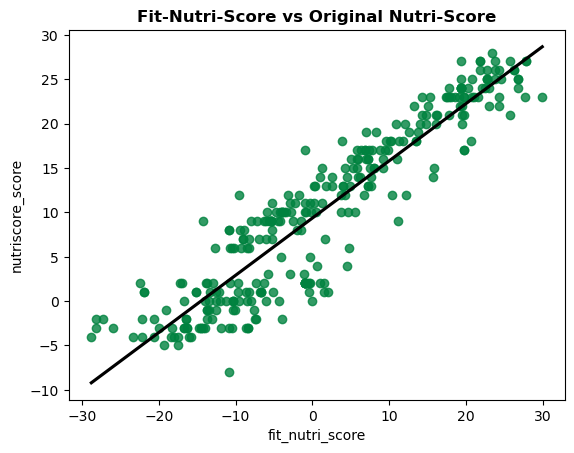

In [29]:
sns.regplot(data=snacks_data, x="fit_nutri_score", y="nutriscore_score", ci=None, color= "#00823F", line_kws=dict(color="black")).set_title(
    "Fit-Nutri-Score vs Original Nutri-Score",
    weight="bold"
)
plt.show()

In [31]:
criterias = snacks_data.columns[6:13].tolist()

grade_palette = {
    "a": "#00823F",
    "b": "#86BC2B",
    "c": "#FECC00",
    "d": "#EE8200",
    "e": "#E73C09",
}

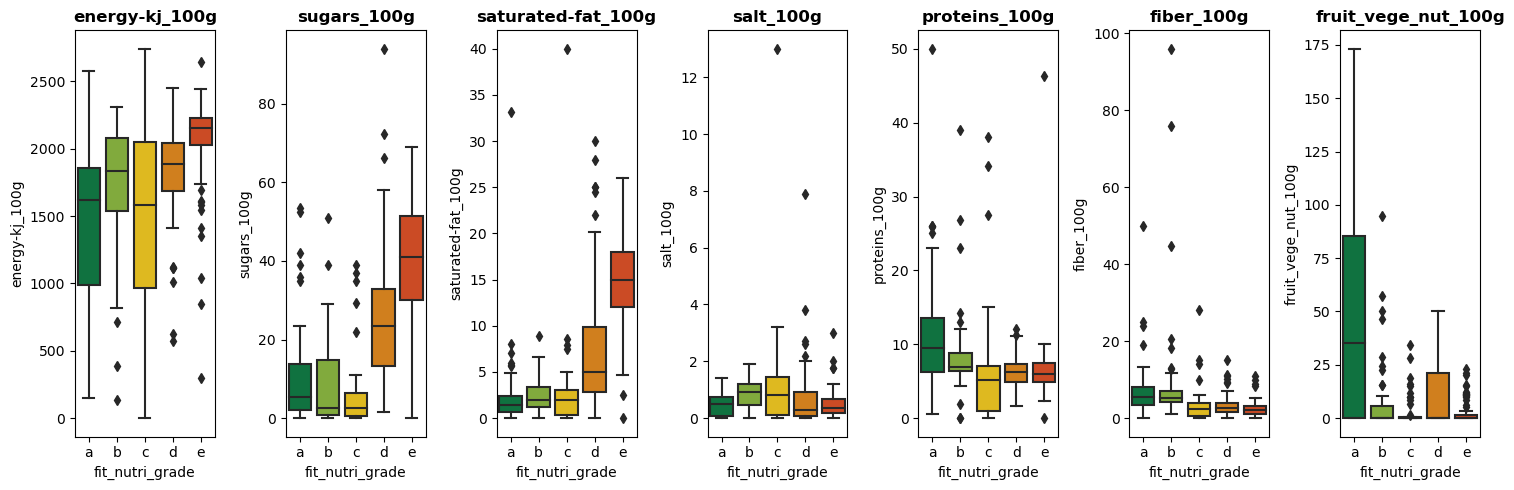

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5))

# Iterate through each feature and create a boxplot grouped by class
for i, feature in enumerate(criterias):  # Exclude the 'Class' column
    sns.boxplot(x='fit_nutri_grade', y=feature, data=snacks_data, ax=axes[i], order="abcde", palette=grade_palette)
    axes[i].set_title(feature, weight="bold")

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

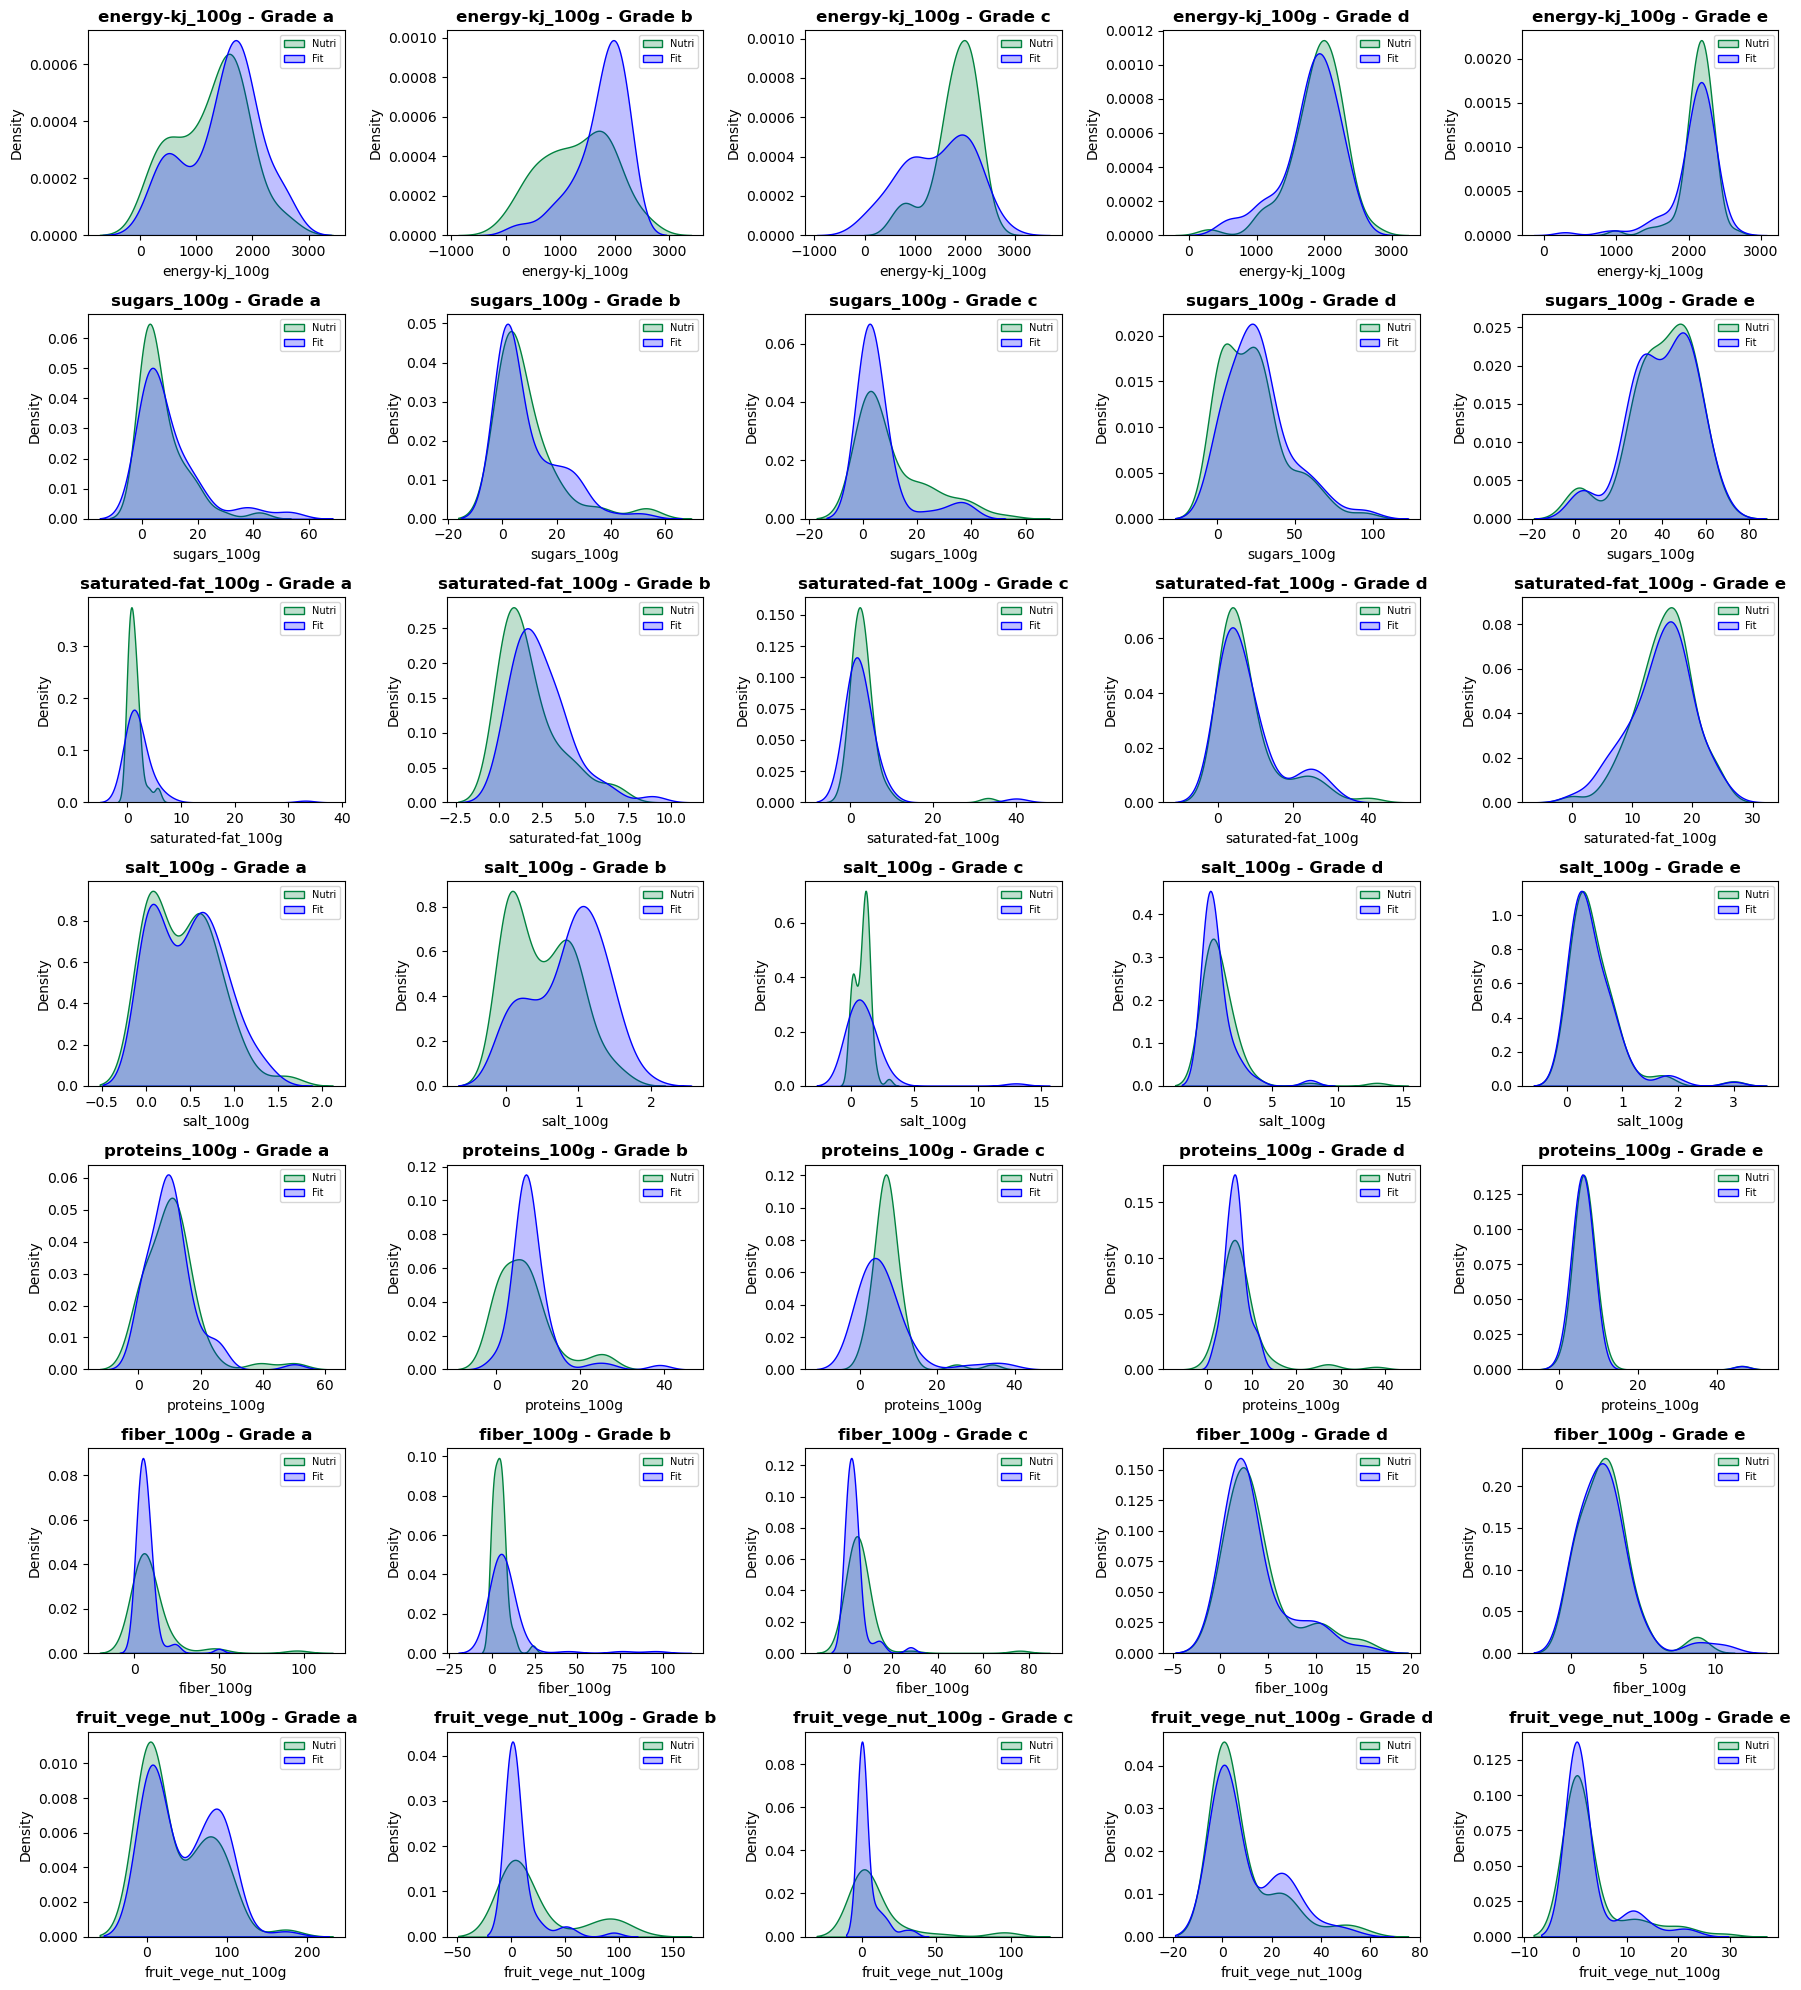

In [41]:
# Number of grades
grades = ['a', 'b', 'c', 'd', 'e']

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(18, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, nutrient in enumerate(criterias):
    for j, grade in enumerate(grades):
        ax = axes[i * len(grades) + j]
        sns.kdeplot(data=snacks_data[snacks_data['nutriscore_grade'] == grade], x=nutrient, fill=True, ax=ax, color='#00823F', label='Nutri')
        sns.kdeplot(data=snacks_data[snacks_data['fit_nutri_grade'] == grade], x=nutrient, fill=True, ax=ax, color='blue', label='Fit')
        ax.set_title(f'{nutrient} - Grade {grade}', weight="bold")
        ax.legend(fontsize=7)

# Adjust layout
plt.tight_layout()
plt.show()


In [42]:
grade_rank = {
    "a": 1,
    "b": 2,
    "c": 3,
    "d": 4,
    "e": 5,
}

In [43]:
snacks_data["rank_change"] = snacks_data.apply(
    lambda x: grade_rank[x["nutriscore_grade"]] - grade_rank[x["fit_nutri_grade"]],
    axis=1
)

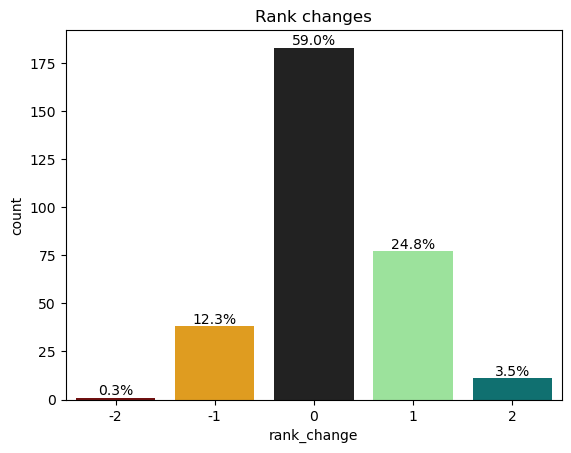

In [46]:
# Creating a countplot for the 'Category' column
ax = sns.countplot(snacks_data, x="rank_change", palette= ["maroon", "orange", "#222222", "lightgreen", "teal"])

# Adding percentage annotations on each bar
total = len(snacks_data['rank_change'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom")
plt.title("Rank changes", weight="bold")
plt.show()

In [47]:
snacks_data["grade_change"] = snacks_data["nutriscore_grade"] + " --> " + snacks_data["fit_nutri_grade"] 

In [48]:
snacks_data.loc[snacks_data["rank_change"] == -1].sample(5)

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,...,sugar_score,fat_score,salt_score,protein_score,fibre_score,fruit_vege_nut_score,fit_nutri_score,fit_nutri_grade,rank_change,grade_change
123,4035900476200,Kinkartz,Waffel Eier,Biscuits and cakes,18.0,d,2185.0,31.1,16.9,0.18,...,7,10,0,3,5,0,13.55,e,-1,d --> e
241,2048348703007,Griesson,soft cake Kirsche,Biscuits and cakes,17.0,d,1607.0,52.0,6.0,0.18,...,10,6,0,1,2,1,19.70,e,-1,d --> e
36,3325710007208,Sans marque,"4 Feuilletés Jambon Fromage, Surgelés",One-dish meals,12.0,d,296.0,3.4,9.2,1.20,...,0,9,5,4,2,0,12.25,e,-1,d --> e
234,8002831113210,Mediterranean Food Solutions,Beignets de Fleur de Courgette,One-dish meals,2.0,b,1146.0,2.5,2.0,0.80,...,0,2,3,2,2,0,-0.35,c,-1,b --> c
104,8718907005838,Albert Heijn,Winegums suikervrij,Sweets,2.0,b,895.0,0.4,0.2,0.10,...,0,0,0,0,0,0,-0.90,c,-1,b --> c


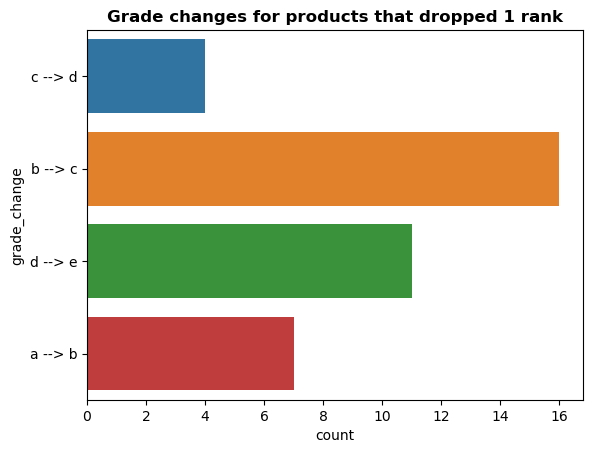

In [50]:
ax = sns.countplot(snacks_data.loc[snacks_data["rank_change"] == -1], y="grade_change", orient = "h").set_title(
    "Grade changes for products that dropped 1 rank",
    weight="bold"
)

In [51]:
# def viz_change(ori, new):
#     fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(18, 5))

#     axes = axes.flatten()

#     for j, criteria in enumerate(criterias):
#         ax = axes[j]
#         sns.kdeplot(data=snacks_data.loc[snacks_data["nutriscore_grade"] == ori], x=criteria, fill=True, ax=ax, color='blue', label=ori)
#         sns.kdeplot(data=snacks_data.loc[snacks_data["nutriscore_grade"] == new], x=criteria, fill=True, ax=ax, color='green', label=new)
#         sns.kdeplot(data=snacks_data.loc[snacks_data["grade_change"] == f"{ori} --> {new}"], x=criteria, fill=True, ax=ax, color='orange', label=f"{ori} --> {new}")
#         # ax.set_title(f'{nutrient} - Grade {grade}')
#         ax.legend(fontsize=8)

#     plt.tight_layout()
#     plt.show()


In [96]:
def viz_change_boxplot(ori, new):
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(13, 5))

    axes = axes.flatten()

    for j, criteria in enumerate(criterias):
        ax = axes[j]
        data_list = [
            snacks_data.loc[snacks_data["nutriscore_grade"] == ori][criteria],
            snacks_data.loc[snacks_data["nutriscore_grade"] == new][criteria],
            snacks_data.loc[snacks_data["grade_change"] == f"{ori} --> {new}"][criteria],
        ]
        sns.boxplot(data_list, ax=ax, palette=[grade_palette[ori], grade_palette[new], "darkgrey"])
        ax.set_title(criteria, weight="bold", fontsize=8)
        ax.set_xticklabels([ori, new, f"{ori} --> {new}"])

    plt.tight_layout()
    plt.suptitle(f"Distribution comparison for products that shifted from {ori} to {new} grade", fontsize=12, weight="bold")
    plt.subplots_adjust(top=0.89)
    plt.show()


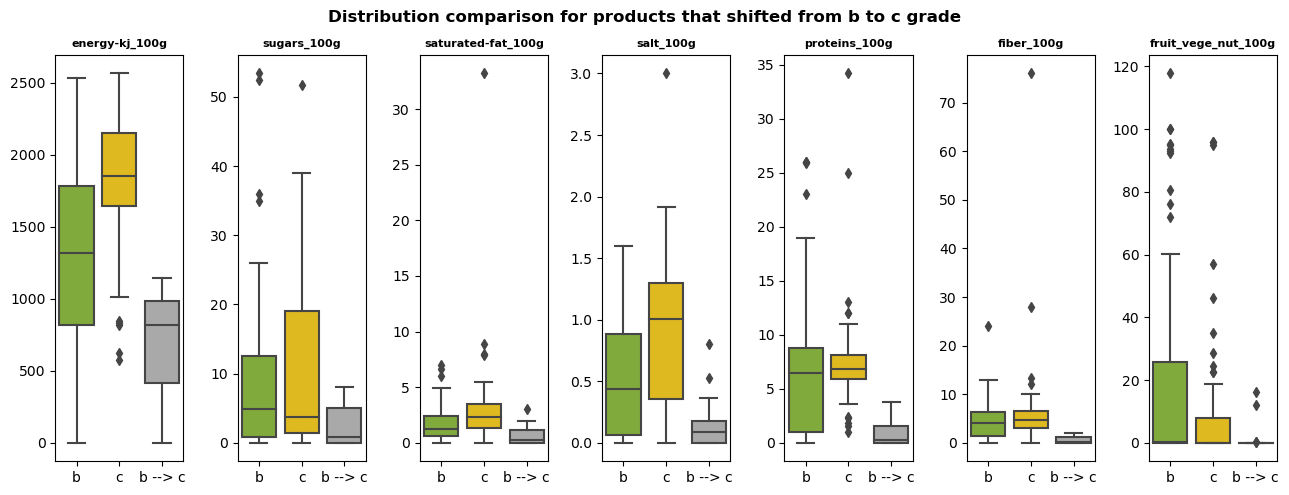

In [97]:
viz_change_boxplot("b", "c")

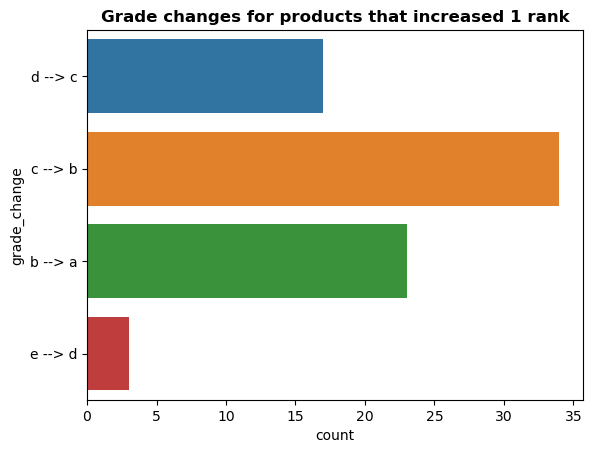

In [98]:
ax = sns.countplot(snacks_data.loc[snacks_data["rank_change"] == 1], y="grade_change", orient = "h").set_title(
    "Grade changes for products that increased 1 rank",
    weight="bold"
)

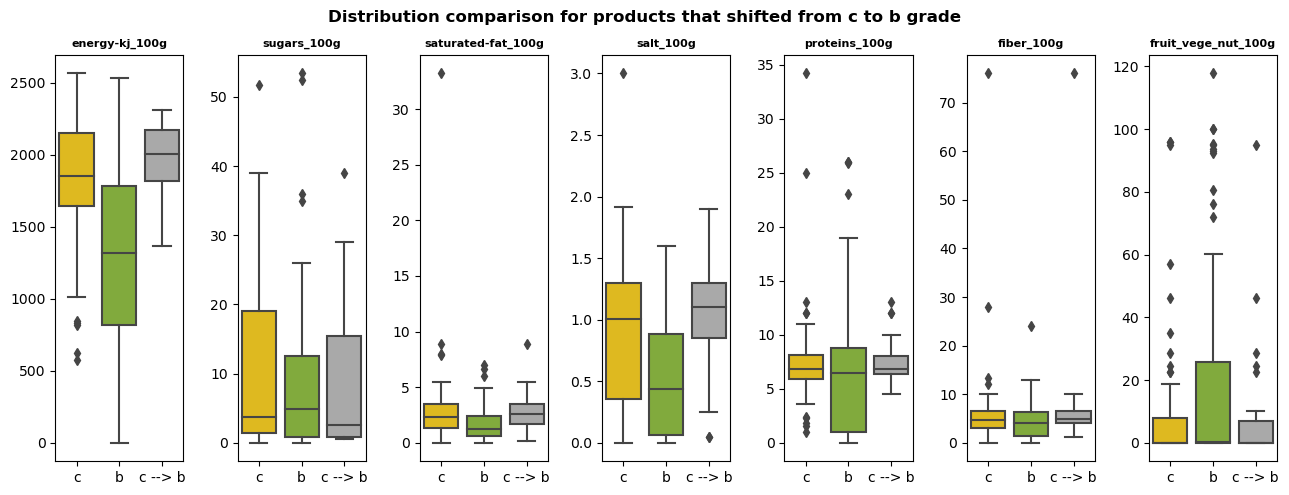

In [99]:
viz_change_boxplot("c", "b")

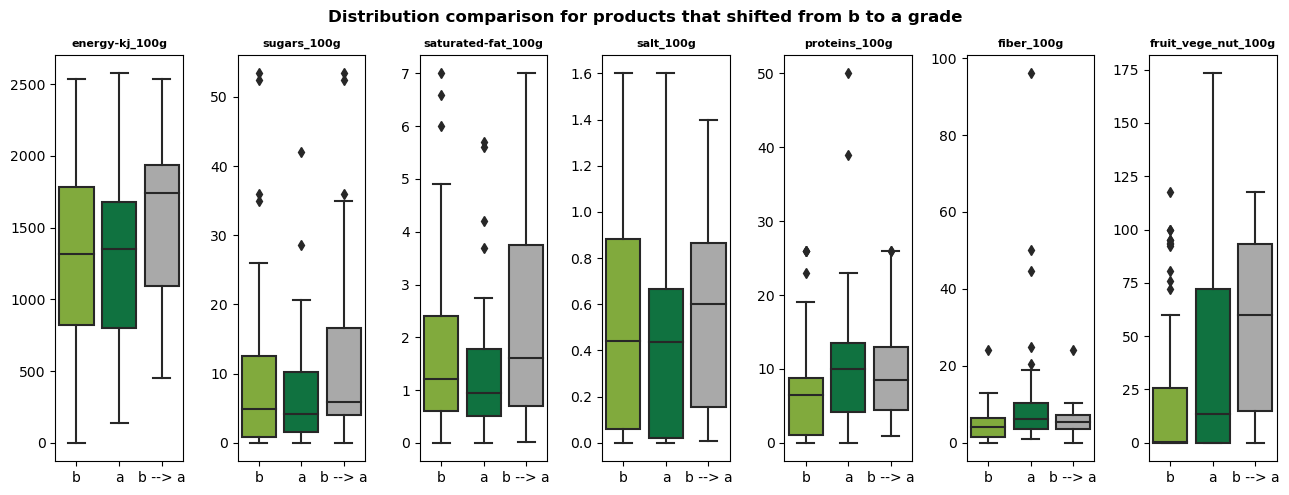

In [100]:
viz_change_boxplot("b", "a")

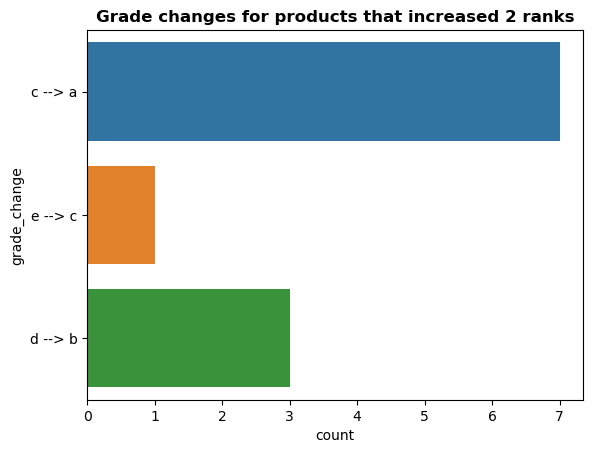

In [101]:
ax = sns.countplot(snacks_data.loc[snacks_data["rank_change"] == 2], y="grade_change", orient = "h").set_title(
    "Grade changes for products that increased 2 ranks",
    weight="bold"
)

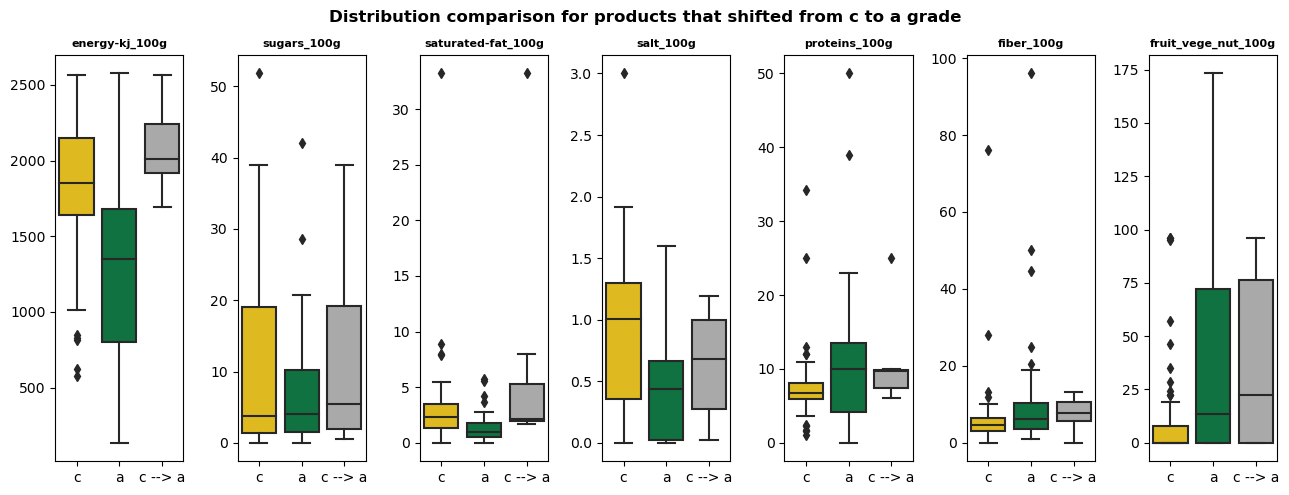

In [102]:
viz_change_boxplot("c", "a")

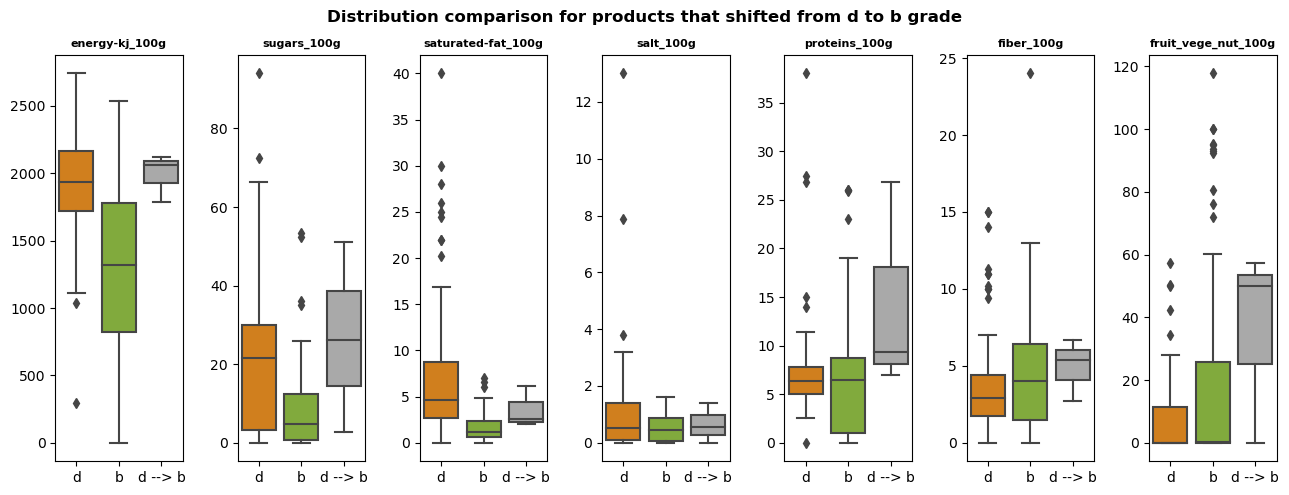

In [103]:
viz_change_boxplot("d", "b")

In [104]:
snacks_data.loc[snacks_data["rank_change"] == 2]["url"].values

array(['http://world-fr.openfoodfacts.org/produit/0640522149100/cookies-noix-de-coco-dattes-et-noix-de-cajou-the-rawlicious-food-company',
       'http://world-fr.openfoodfacts.org/produit/7067104216914/date-hazelnut-cocoa-bars-knusperone',
       'http://world-fr.openfoodfacts.org/produit/5060283760126/proper-corn-sweet-coconut-vanilla',
       'http://world-fr.openfoodfacts.org/produit/4337185833038/knusprige-salz-tortilla-chips-k-classic',
       'http://world-fr.openfoodfacts.org/produit/8003130142260/1936-antica-ricetta-san-carlo',
       'http://world-fr.openfoodfacts.org/produit/7610700015605/eucalyptus-ricola-sans-sucre',
       'http://world-fr.openfoodfacts.org/produit/5012262010166/flamegrilled-aberdeen-angus-potato-chips-mackie-s-of-scotland',
       'http://world-fr.openfoodfacts.org/produit/5060293441398/bodyme-organic-vegan-protein-bar-cacao-orange-body-me',
       'http://world-fr.openfoodfacts.org/produit/8431876249880/figuritas-de-mazapan-de-nuestra-tierra',
       'h

In [105]:
snacks_data.loc[snacks_data["rank_change"] == 2]

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,...,sugar_score,fat_score,salt_score,protein_score,fibre_score,fruit_vege_nut_score,fit_nutri_score,fit_nutri_grade,rank_change,grade_change
37,640522149100,The Rawlicious Food Company,"Cookies Noix de Coco, Dattes et Noix de Cajou",Biscuits and cakes,8.0,c,2450.0,23.40,33.20,0.32,...,5,10,1,5,5,12,-10.90,a,2,c --> a
57,7067104216914,Knusperone,"Date, hazelnut & cocoa bars",Chocolate products,9.0,c,1831.0,39.00,2.50,0.02,...,8,2,0,5,5,8,-14.25,a,2,c --> a
64,5060283760126,Proper Corn,Proper Corn - Sweet Coconut & Vanilla,unknown,6.0,c,2033.0,15.10,1.90,0.23,...,3,1,1,4,5,2,-12.70,a,2,c --> a
77,4337185833038,K-Classic,Knusprige Salz Tortilla Chips,One-dish meals,6.0,c,2013.0,0.60,2.10,0.90,...,0,2,4,5,5,0,-10.70,a,2,c --> a
122,8003130142260,San Carlo,1936 Antica Ricetta,Appetizers,6.0,c,1998.0,0.60,2.10,1.10,...,0,2,4,5,5,0,-10.25,a,2,c --> a
140,7610700015605,RICOLA SANS SUCRE,Eucalyptus,Artificially sweetened beverages,10.0,e,986.0,0.00,0.00,0.00,...,0,0,0,0,0,0,-0.90,c,2,e --> c
187,5012262010166,Mackie's of Scotland,Flamegrilled aberdeen angus Potato Chips,Appetizers,12.0,d,2120.0,2.70,2.60,1.40,...,0,2,6,5,2,0,-3.20,b,2,d --> b
263,5060293441398,Body Me,BodyMe Organic Vegan Protein Bar Cacao Orange,Biscuits and cakes,12.0,d,1785.0,26.10,6.20,0.57,...,5,6,2,5,5,8,-9.50,b,2,d --> b
264,8431876249880,De nuestra tierra,Figuritas de mazapan,Biscuits and cakes,11.0,d,2064.0,51.00,2.00,0.00,...,10,2,0,5,5,4,-5.20,b,2,d --> b
271,7501011176461,Sunbites,Sunbites Palomitas sabor Cheddar Blanco,Salty and fatty products,6.0,c,1690.0,3.33,1.67,1.19,...,0,1,5,5,5,0,-10.50,a,2,c --> a


In [106]:
snacks_data.loc[snacks_data["rank_change"] == -2]["url"].values

array(['http://world-fr.openfoodfacts.org/produit/8000300375855/la-cremeria-nestle'],
      dtype=object)

In [107]:
snacks_data.loc[snacks_data["rank_change"] == -2]

,code,brands,product_name,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kj_100g,sugars_100g,saturated-fat_100g,salt_100g,...,sugar_score,fat_score,salt_score,protein_score,fibre_score,fruit_vege_nut_score,fit_nutri_score,fit_nutri_grade,rank_change,grade_change
170,8000300375855,"Nestle,Motta",La Cremeria,Ice cream,9.0,c,847.0,22.0,4.7,0.1,...,4,4,0,1,0,0,11.1,e,-2,c --> e


In [108]:
# snacks_data.to_csv("fit_nutri_score_classification.csv", index=False)